Statlog (Vehicle Silhouettes) Data Set

Data Set Information:

The purpose is to classify a given silhouette as one of four types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles. 

HISTORY: 

This data was originally gathered at the TI in 1986-87 by JP Siebert. It was partially financed by Barr and Stroud Ltd. The original purpose was to find a method of distinguishing 3D objects within a 2D image by application of an ensemble of shape feature extractors to the 2D silhouettes of the objects. Measures of shape features extracted from example silhouettes of objects to be discriminated were used to generate a classification rule tree by means of computer induction. 

This object recognition strategy was successfully used to discriminate between silhouettes of model cars, vans and buses viewed from constrained elevation but all angles of rotation.


DESCRIPTION: 

The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars. 

Attribute Information:

1. All the features are geometric features extracted from the silhouette.  
2. All are numeric in nature. 
 

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# read the given dataset and get a glance of first five records
# using dropna to remove the missing values

data=pd.read_csv("vehicle.csv",sep=",")
data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [3]:
# get columns and data count

data.shape

(846, 19)

In [4]:
# Dataset has 846 rows and 19 columns
# Checking column data types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [5]:
# Checking the data description
data.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   841.000000            842.000000    840.000000   
mean     93.678487    44.828775             82.110451    168.888095   
std       8.234474     6.152172             15.778292     33.520198   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            844.000000               846.000000     845.000000   
mean              61.678910                 8.567376     168.901775   
std                7.891463                 4.601217      33.214848   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     845.000000              843.000000                 846.000000   
mean       40.933728               20.582444                 147.998818   
std         7.816186                2.592933                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       843.000000         844.000000                 844.000000   
mean        188.631079         439.494076                 174.709716   
std          31.411004         176.666903                  32.584808   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         587.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   842.000000      840.000000        845.000000   
mean                     72.447743        6.364286         12.602367   
std                       7.486190        4.920649          8.936081   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        845.000000     846.000000  
mean         188.919527     195.632388  
std            6.155809       7.438797  
min          176.000000     181.000000  
25%          184.000000     190.250000  
50%          188.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

In [6]:
# Getting number of unique data
data.apply(lambda x: len(x.unique()))

compactness                     44
circularity                     28
distance_circularity            64
radius_ratio                   135
pr.axis_aspect_ratio            38
max.length_aspect_ratio         21
scatter_ratio                  132
elongatedness                   36
pr.axis_rectangularity          14
max.length_rectangularity       66
scaled_variance                129
scaled_variance.1              423
scaled_radius_of_gyration      144
scaled_radius_of_gyration.1     40
skewness_about                  24
skewness_about.1                42
skewness_about.2                31
hollows_ratio                   31
class                            3
dtype: int64

In [7]:
# Having a different look at description by transposing
data.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [8]:
#checking for missing values in data

data.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

1. We can see that there are many columns that have missing values

2. on seeing the dataset, it looks like many of such values were missed

3. Replacing the missing values with random inputs of the Inter Qurtile Range between 25% and 75% (see above in    
   data.describe/transpose)

In [9]:
import random

data['circularity']=data['circularity'].fillna(random.randrange(40, 49))
data['distance_circularity']=data['distance_circularity'].fillna(random.randrange(70, 98))
data['radius_ratio']=data['radius_ratio'].fillna(random.randrange(114, 195))
data['pr.axis_aspect_ratio']=data['pr.axis_aspect_ratio'].fillna(random.randrange(57, 65))
data['scatter_ratio']=data['scatter_ratio'].fillna(random.randrange(147, 198))
data['elongatedness']=data['elongatedness'].fillna(random.randrange(33, 46))
data['pr.axis_rectangularity']=data['pr.axis_rectangularity'].fillna(random.randrange(19, 23))
data['scaled_variance']=data['scaled_variance'].fillna(random.randrange(167, 217))
data['scaled_variance.1']=data['scaled_variance.1'].fillna(random.randrange(318, 587))
data['scaled_radius_of_gyration']=data['scaled_radius_of_gyration'].fillna(random.randrange(149, 198))
data['scaled_radius_of_gyration.1']=data['scaled_radius_of_gyration.1'].fillna(random.randrange(67, 75))
data['skewness_about']=data['skewness_about'].fillna(random.randrange(2, 9))
data['skewness_about.1']=data['skewness_about.1'].fillna(random.randrange(5, 19))
data['skewness_about.2']=data['skewness_about.2'].fillna(random.randrange(184, 193))

In [10]:
# Check for correlation of variable
data.corr(method='pearson')

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.686051              0.788556   
circularity                     0.686051     1.000000              0.793429   
distance_circularity            0.788556     0.793429              1.000000   
radius_ratio                    0.686673     0.615111              0.758020   
pr.axis_aspect_ratio            0.091025     0.151268              0.156751   
max.length_aspect_ratio         0.148249     0.250796              0.263367   
scatter_ratio                   0.811764     0.848644              0.902406   
elongatedness                  -0.788123    -0.821824             -0.910035   
pr.axis_rectangularity          0.812887     0.846945              0.891545   
max.length_rectangularity       0.676143     0.962649              0.774246   
scaled_variance                 0.761297     0.797993              0.859744   
scaled_variance.1               0.815958     0.839883              0.886088   
scaled_radius_of_gyration       0.583521     0.927693              0.705625   
scaled_radius_of_gyration.1    -0.248240     0.055480             -0.221066   
skewness_about                  0.236078     0.144913              0.115610   
skewness_about.1                0.157478    -0.012382              0.263626   
skewness_about.2                0.298473    -0.107604              0.142680   
hollows_ratio                   0.365552     0.043850              0.327986   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.686673              0.091025   
circularity                      0.615111              0.151268   
distance_circularity             0.758020              0.156751   
radius_ratio                     1.000000              0.662782   
pr.axis_aspect_ratio             0.662782              1.000000   
max.length_aspect_ratio          0.449166              0.648715   
scatter_ratio                    0.727682              0.102829   
elongatedness                   -0.783413             -0.182410   
pr.axis_rectangularity           0.700844              0.077604   
max.length_rectangularity        0.563911              0.126252   
scaled_variance                  0.787230              0.272005   
scaled_variance.1                0.714054              0.088925   
scaled_radius_of_gyration        0.528391              0.119794   
scaled_radius_of_gyration.1     -0.178801              0.153322   
skewness_about                   0.045116             -0.058319   
skewness_about.1                 0.175327             -0.031249   
skewness_about.2                 0.380227              0.239175   
hollows_ratio                    0.470819              0.267702   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.148249       0.811764   
circularity                                 0.250796       0.848644   
distance_circularity                        0.263367       0.902406   
radius_ratio                                0.449166       0.727682   
pr.axis_aspect_ratio                        0.648715       0.102829   
max.length_aspect_ratio                     1.000000       0.165735   
scatter_ratio                               0.165735       1.000000   
elongatedness                              -0.179744      -0.969410   
pr.axis_rectangularity                      0.161689       0.988335   
max.length_rectangularity                   0.305943       0.807566   
scaled_variance                             0.318878       0.946867   
scaled_variance.1                           0.143727       0.993210   
scaled_radius_of_gyration                   0.188995       0.797524   
scaled_radius_of_gyration.1                 0.296051      -0.027002   
skewness_about                              0.015599       0.074398   
skewness_about.1                            0.043505       0.213521   
skewness_about.2                           -0.

1. compactness shows high correlation with distance_circularity, scatter_ratio, pr.axis_rectangularity, scaled_variance and 
   scaled_variance.1
   
2. circularity shows high correlation with scaled_radius_of_gyration, max.length_rectangularity, distance_circularity,   
   scatter_ratio
   
3. scaled_variance shows high correlation with scatter_ratio, pr.axis_rectangularity, distance_circularity and circularity

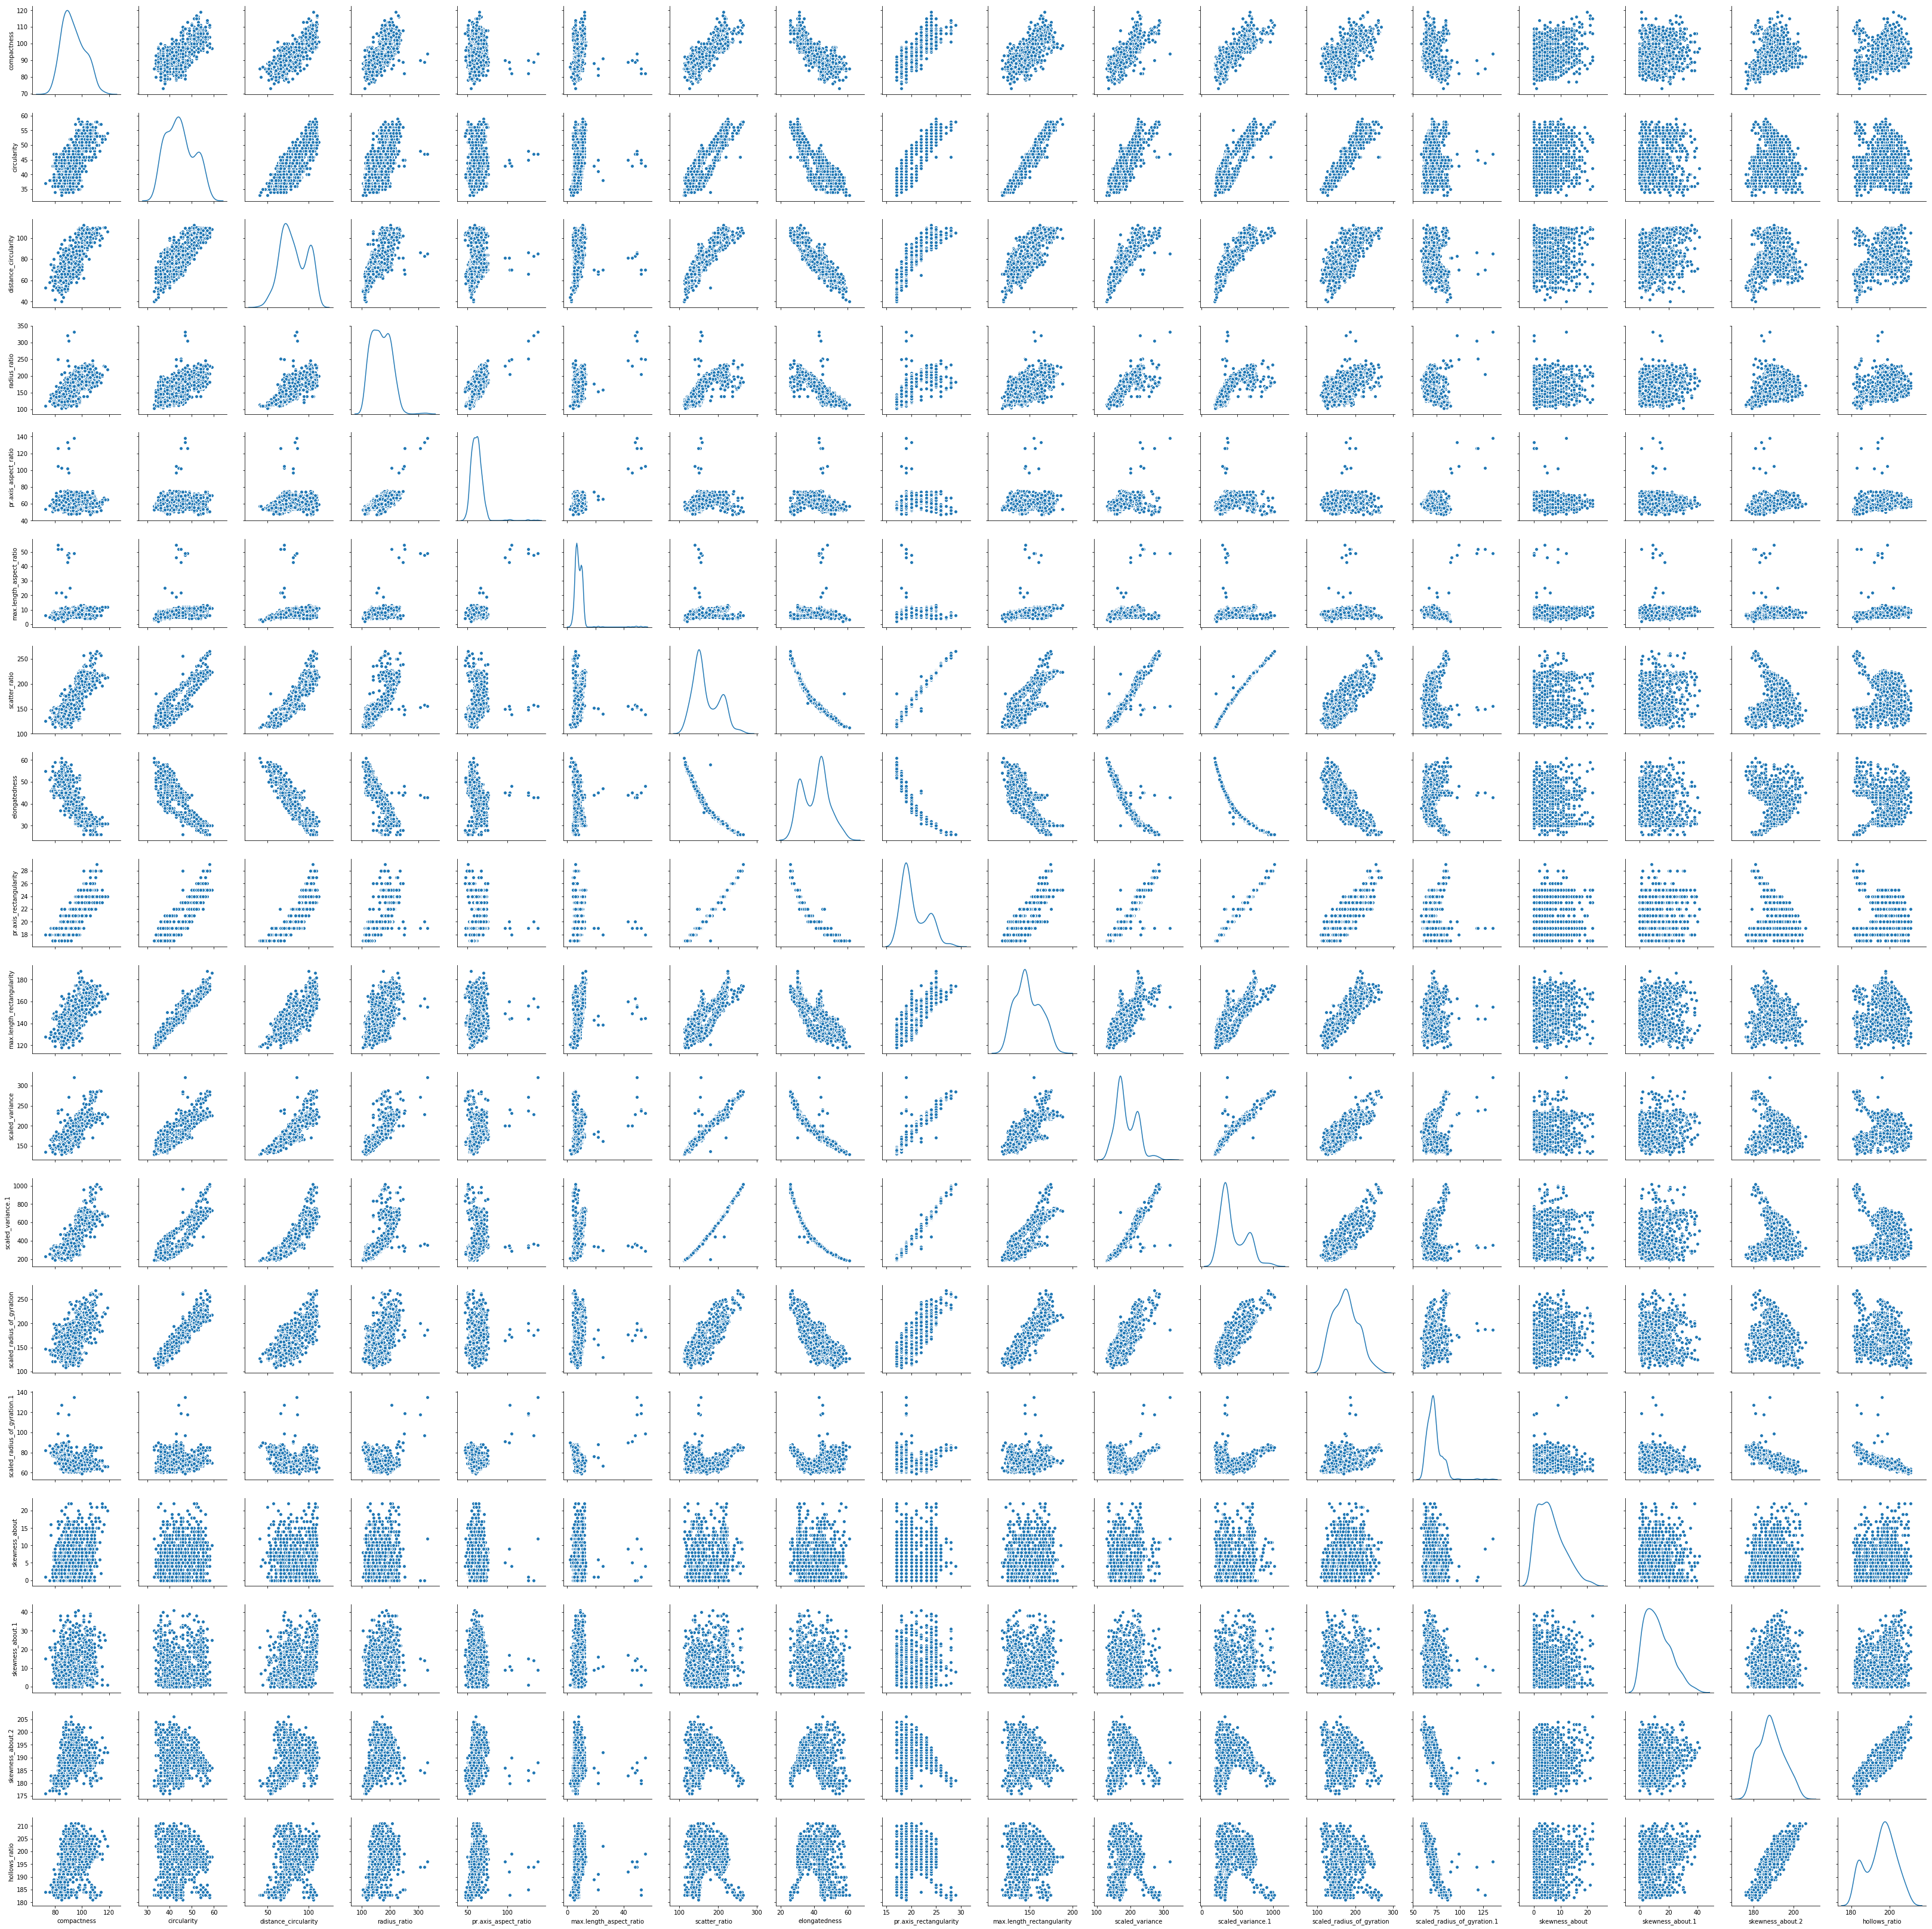

In [11]:
# checking for pair plots
sns.pairplot(data,diag_kind='kde')

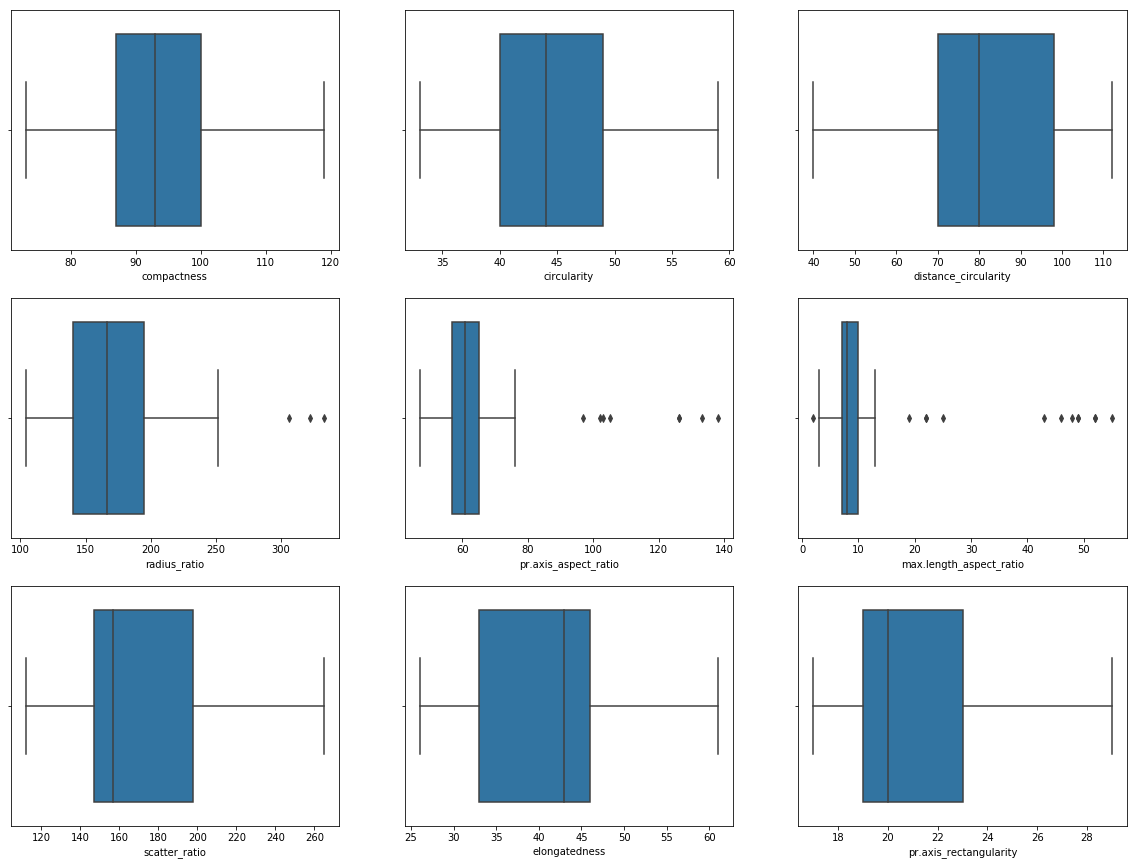

In [12]:
# Data Visualization using boxplot

f,axes=plt.subplots(3,3,figsize=(20,15))
sns.boxplot(data['compactness'],ax=axes[0,0])
sns.boxplot(data['circularity'],ax=axes[0,1])
sns.boxplot(data['distance_circularity'],ax=axes[0,2])
sns.boxplot(data['radius_ratio'],ax=axes[1,0])
sns.boxplot(data['pr.axis_aspect_ratio'],ax=axes[1,1])
sns.boxplot(data['max.length_aspect_ratio'],ax=axes[1,2])
sns.boxplot(data['scatter_ratio'],ax=axes[2,0])
sns.boxplot(data['elongatedness'],ax=axes[2,1])
sns.boxplot(data['pr.axis_rectangularity'],ax=axes[2,2])
plt.show()

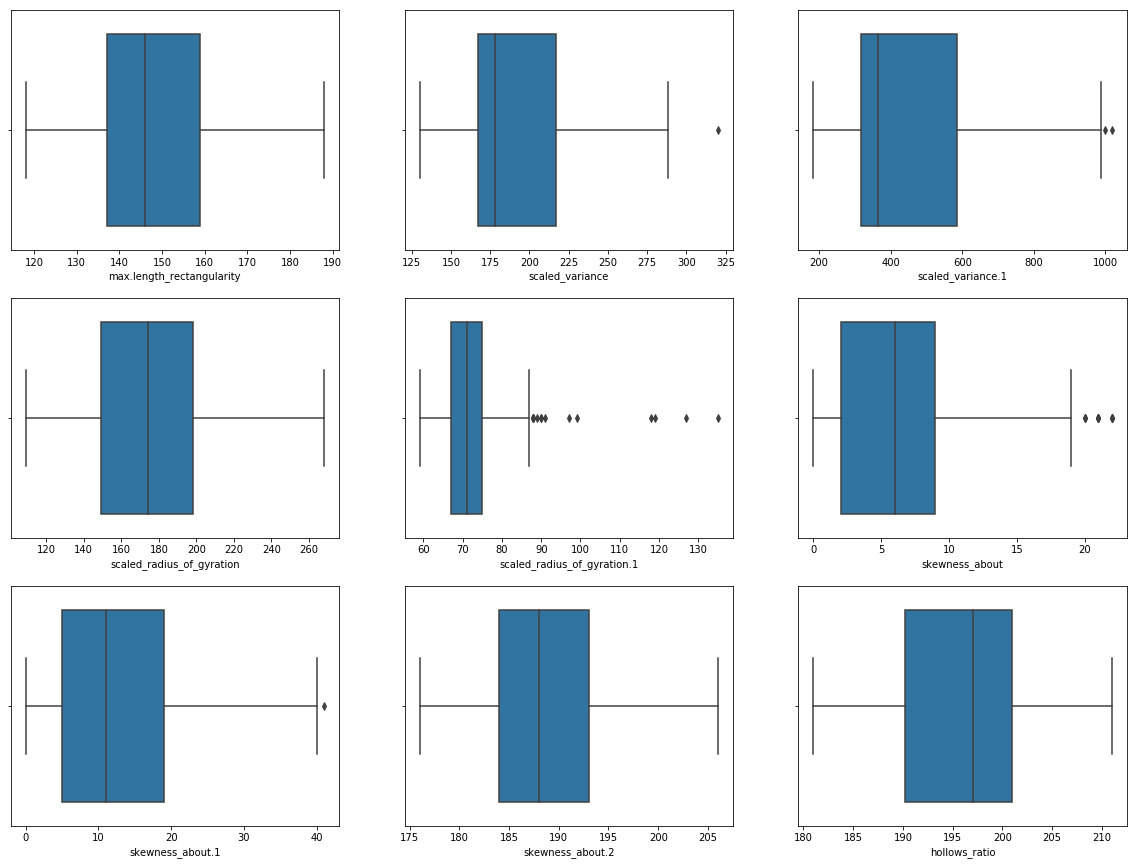

In [13]:
f,axes=plt.subplots(3,3,figsize=(20,15))
sns.boxplot(data['max.length_rectangularity'],ax=axes[0,0])
sns.boxplot(data['scaled_variance'],ax=axes[0,1])
sns.boxplot(data['scaled_variance.1'],ax=axes[0,2])
sns.boxplot(data['scaled_radius_of_gyration'],ax=axes[1,0])
sns.boxplot(data['scaled_radius_of_gyration.1'],ax=axes[1,1])
sns.boxplot(data['skewness_about'],ax=axes[1,2])
sns.boxplot(data['skewness_about.1'],ax=axes[2,0])
sns.boxplot(data['skewness_about.2'],ax=axes[2,1])
sns.boxplot(data['hollows_ratio'],ax=axes[2,2])
plt.show()

In [18]:
# We see some outliers int the columns like radius_ratio, pr.axis_aspect_ratio etc. which needs to be handled

for i in range(len(data['radius_ratio'])):
    if data.loc[i,'radius_ratio']>300:
        data.loc[i,'radius_ratio']= random.randrange(114, 195)

In [19]:
for i in range(len(data['pr.axis_aspect_ratio'])):
    if data.loc[i,'pr.axis_aspect_ratio']>90:
        data.loc[i,'pr.axis_aspect_ratio']= random.randrange(57, 65)

In [20]:
for i in range(len(data['max.length_aspect_ratio'])):
    if data.loc[i,'max.length_aspect_ratio']>18:
        data.loc[i,'max.length_aspect_ratio']= random.randrange(7, 10)

In [21]:
for i in range(len(data['max.length_aspect_ratio'])):
    if data.loc[i,'max.length_aspect_ratio']<3:
        data.loc[i,'max.length_aspect_ratio']= random.randrange(7, 10)

In [22]:
for i in range(len(data['scaled_variance'])):
    if data.loc[i,'scaled_variance']>300:
        data.loc[i,'scaled_variance']= random.randrange(167, 217)

In [23]:
for i in range(len(data['scaled_variance.1'])):
    if data.loc[i,'scaled_variance.1']>982:
        data.loc[i,'scaled_variance.1']= random.randrange(318, 587)

In [24]:
for i in range(len(data['scaled_radius_of_gyration.1'])):
    if data.loc[i,'scaled_radius_of_gyration.1']>87:
        data.loc[i,'scaled_radius_of_gyration.1']= random.randrange(67, 75)

In [25]:
for i in range(len(data['skewness_about'])):
    if data.loc[i,'skewness_about']>18:
        data.loc[i,'skewness_about']= random.randrange(2, 9)

In [26]:
for i in range(len(data['skewness_about.1'])):
    if data.loc[i,'skewness_about.1']>39:
        data.loc[i,'skewness_about.1']= random.randrange(5, 19)

In [27]:
data_newset=data.drop('class',axis=1)

In [28]:
from scipy.stats import zscore
data_newset=data_newset.apply(zscore)
data_newset.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.516117              0.052901      0.305991   
1    -0.325470    -0.625626              0.116382     -0.842466   
2     1.254193     0.842330              1.512966      1.268212   
3    -0.082445    -0.625626             -0.010580     -0.283757   
4    -1.054545    -0.136307             -0.772353      1.144054   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.932302                 0.909952      -0.208420   
1             -0.738530                 0.425484      -0.600248   
2              0.863969                 0.909952       1.147911   
3              0.329803                 0.425484      -0.750952   
4              0.329803                -0.058984      -0.600248   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.137295               -0.226983                   0.758332   
1       0.521478               -0.613357                  -0.344578   
2      -1.143315                0.932138                   0.689401   
3       0.649538               -0.613357                  -0.344578   
4       0.521478               -0.613357                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.400421          -0.336752                   0.284098   
1        -0.593793          -0.619703                  -0.514907   
2         1.114329           1.141526                   1.390413   
3        -0.916081          -0.740968                  -1.467567   
4         1.694446          -0.648576                   0.407022   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.312215       -0.014993          0.391895   
1                     0.012075        0.652577          0.165199   
2                     0.174220        1.765194         -0.401541   
3                    -1.447230       -0.014993         -0.288193   
4                    -0.312215        0.652577         -0.174845   

   skewness_about.2  hollows_ratio  
0         -0.312572       0.183957  
1          0.012687       0.452977  
2         -0.149942       0.049447  
3          1.638983       1.529056  
4         -1.450978      -1.699181

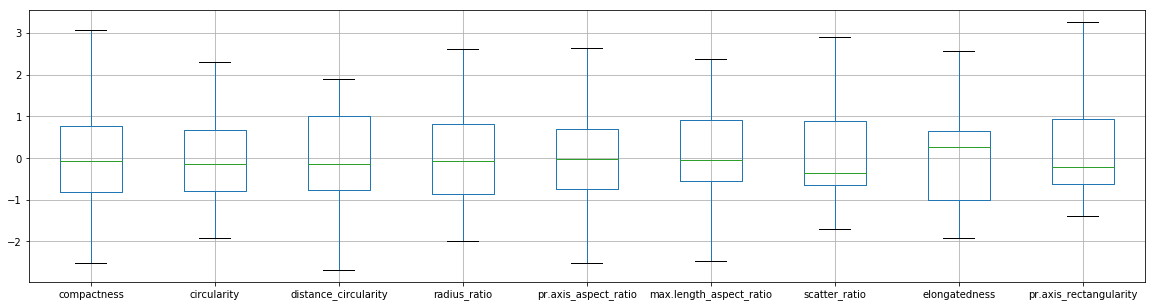

In [29]:
data_newset.boxplot(column=['compactness','circularity','distance_circularity','radius_ratio','pr.axis_aspect_ratio','max.length_aspect_ratio','scatter_ratio','elongatedness','pr.axis_rectangularity'],figsize=(20,5))

We can see from the boxplot that the data is free from outliers and nearly on same scale

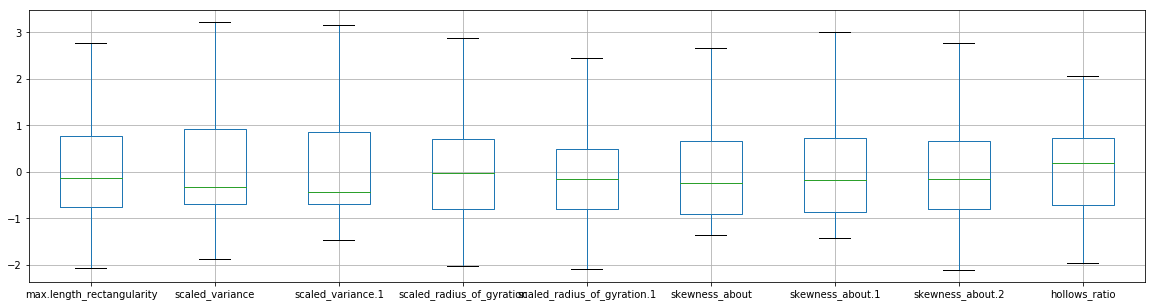

In [30]:
# checking the boxplot for other remaining columns in the dataset

data_newset.boxplot(column=['max.length_rectangularity','scaled_variance','scaled_variance.1','scaled_radius_of_gyration','scaled_radius_of_gyration.1','skewness_about','skewness_about.1','skewness_about.2','hollows_ratio'],figsize=(20,5))

PCA:
    
1. In few steps above we have transformed and scaled the data using z-scores

2. We also removed the dependent variable 'çlass'

In [31]:
# Creating covariance matrix

cov_matrix = np.cov(data_newset.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00118343e+00  6.86862409e-01  7.89488835e-01  7.19552781e-01
   1.92296116e-01  4.98617339e-01  8.12725054e-01 -7.89055570e-01
   8.13849196e-01  6.76943342e-01  7.70022934e-01  8.08241761e-01
   5.84211435e-01 -2.46020870e-01  1.86342117e-01  1.57561764e-01
   2.98826488e-01  3.65984455e-01]
 [ 6.86862409e-01  1.00118343e+00  7.94368209e-01  6.32999423e-01
   2.00253342e-01  5.57432670e-01  8.49648193e-01 -8.22796491e-01
   8.47947095e-01  9.63788141e-01  8.05688119e-01  8.29849169e-01
   9.28790830e-01  7.21623327e-02  1.32352652e-01 -6.64214360e-03
  -1.07731022e-01  4.39022028e-02]
 [ 7.89488835e-01  7.94368209e-01  1.00118343e+00  7.85796032e-01
   2.42117159e-01  6.62508843e-01  9.03474029e-01 -9.11112237e-01
   8.92599686e-01  7.75161973e-01  8.68966919e-01  8.84362095e-01
   7.06459596e-01 -2.23507315e-01  9.76200271e-02  2.65231308e-01
   1.42848552e-01  3.28374461e-01]
 [ 7.19552781e-01  6.32999423e-01  7.85796032e-01  1.00118343e+00
   6.47839315e-

In [32]:
# eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-2.72812597e-01  8.77002275e-02 -3.08648918e-02  1.37752150e-01
  -1.24258373e-01  2.68246793e-01  2.03928682e-01 -7.55419460e-01
  -3.68441451e-01 -1.36768565e-01 -1.32438291e-01  7.05835679e-03
   1.70560103e-02 -6.59644077e-02 -2.53001382e-02  1.26713524e-01
   6.42319982e-02 -2.83349194e-02]
 [-2.88066358e-01 -1.33340136e-01 -2.03298626e-01 -3.39616498e-02
   1.29911058e-01 -7.05553700e-02 -3.89246572e-01 -6.59811108e-02
  -5.32214626e-02  1.43723682e-01  6.15880157e-02 -1.56769912e-01
   5.13589216e-02  1.51536105e-02  7.36620346e-01  8.14952850e-02
   1.03927154e-01 -2.53485626e-01]
 [-3.02402793e-01  4.43788926e-02  6.61475650e-02  1.05965977e-01
   7.92461879e-02 -2.17992771e-02  1.55214940e-01  2.76346032e-01
  -5.66138358e-02 -2.82947733e-01 -5.27168398e-01 -6.03189545e-01
  -1.20510321e-02  1.87862704e-01 -7.28676986e-03 -8.64103006e-02
  -1.25560858e-01 -5.75505629e-03]
 [-2.67992675e-01  2.00174477e-01  5.03846018e-02 -2.52074555e-01
  -1.42395668e-01 -

In [33]:
# Variance and Cumulative Variance by each eigen vector

tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance", cum_var_exp)

Cumulative Variance [ 53.97307641  72.53487556  79.05769117  85.37536667  90.28521096
  94.02869777  95.80946318  97.08499681  97.83474104  98.30045354
  98.7442423   99.11654124  99.35536699  99.54222551  99.71828042
  99.85582171  99.95904021 100.        ]


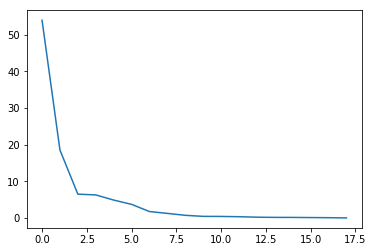

In [34]:
# The Eigen values are sorted from highest to lowest variance.

# For 95% variation (7 components should be fine instead of 19)

plt.plot(var_exp)

We can observe that the Elbow/Knee is found at around 2, so we can use k=2 number of clusters as an optimal value

In [35]:
# NOTE - generate PCA (7 dimensions to capture 95% variance)

from sklearn.decomposition import PCA

pca = PCA(n_components=7)
data_pca = pca.fit_transform(data_newset)

In [36]:
pca.components_

array([[ 0.2728126 ,  0.28806636,  0.30240279,  0.26799268,  0.09719583,
         0.19489723,  0.31052298, -0.30920859,  0.30759533,  0.27860572,
         0.29991173,  0.30567229,  0.26317021, -0.04147869,  0.03440531,
         0.059567  ,  0.0373801 ,  0.08444053],
       [-0.08770023,  0.13334014, -0.04437889, -0.20017448, -0.25878254,
        -0.10740198,  0.07431703, -0.01225884,  0.08726215,  0.12230133,
         0.076268  ,  0.06655077,  0.2119631 ,  0.50246381, -0.00657245,
        -0.090851  , -0.50203002, -0.50770591],
       [-0.03086489, -0.20329863,  0.06614756,  0.0503846 , -0.08534108,
        -0.14616304,  0.11111428, -0.09082841,  0.10694891, -0.21512844,
         0.14165458,  0.10583464, -0.20493113,  0.07556691, -0.52896137,
         0.69215707, -0.06370175, -0.04391039],
       [ 0.13775215, -0.03396165,  0.10596598, -0.25207455, -0.59863128,
         0.26987077,  0.00238646,  0.06733547,  0.02755207,  0.04332683,
        -0.06711462, -0.00178656, -0.07985094, -0.116

In [37]:
#Converting to dataframe
data_comp_fullset = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])

#reinserting the droped target variable
data_comp_fullset['class'] = data['class']
data_comp_fullset.head(20)

PC1       PC2       PC3       PC4       PC5       PC6       PC7 class
0   0.581297 -0.672464 -0.495073 -0.725718 -0.687168 -1.882230 -0.200578   van
1  -1.513259 -0.337897 -0.297018  1.289236 -0.332865 -0.134565  0.198560   van
2   3.909498  0.243247 -1.267315  0.241324  0.978111 -0.690664  0.816296   car
3  -1.540405 -3.039680 -0.489398  0.352561 -0.601700  0.332476  0.113943   van
4  -0.602142  1.280506 -0.307859 -0.704132  0.560280 -1.201039  0.483730   bus
5   5.486309  4.678390  1.132218  0.176498  1.452841  2.539090  0.275262   bus
6  -0.821148 -2.207536 -1.992396 -0.257819  1.578746  0.663338 -0.386308   bus
7  -1.962254 -1.557256 -1.074046 -0.885449 -1.166669  0.019628 -0.331211   van
8  -4.384118 -3.292128  0.550974  0.033885 -0.461902  0.650199 -0.353699   van
9   0.997025 -1.813884  0.423305  0.671697 -1.168798  0.456669  0.542562   car
10 -3.316851 -2.056466  0.256400 -0.047048 -1.108622  0.296363  0.440480   van
11 -4.446997 -2.319793  1.517559  1.422698  0.434384  0.560405 -0.377156   car
12 -0.894216 -0.172365 -0.352212 -1.394957  0.423695 -0.691958 -1.003916   bus
13 -1.259359 -0.053369 -0.317189  1.056565 -0.799538 -0.435326  0.425227   van
14  1.075308 -0.953465 -1.115321 -2.330842  1.345601  0.253297 -1.091091   bus
15  3.848330  1.294329 -1.185839 -1.231942 -0.231457 -0.038329 -0.379817   car
16 -5.475610  1.906747  0.926560  0.526861 -0.422284  0.465880  0.244664   van
17  0.302825 -1.631324  0.568048 -1.639102  1.428427  0.596535  0.481832   bus
18  4.252788  1.314122 -0.218679 -0.029969 -0.632169  0.267658 -0.107421   car
19  4.194958  1.374617 -0.795242 -0.312022 -0.517127  0.466312  0.053420   car

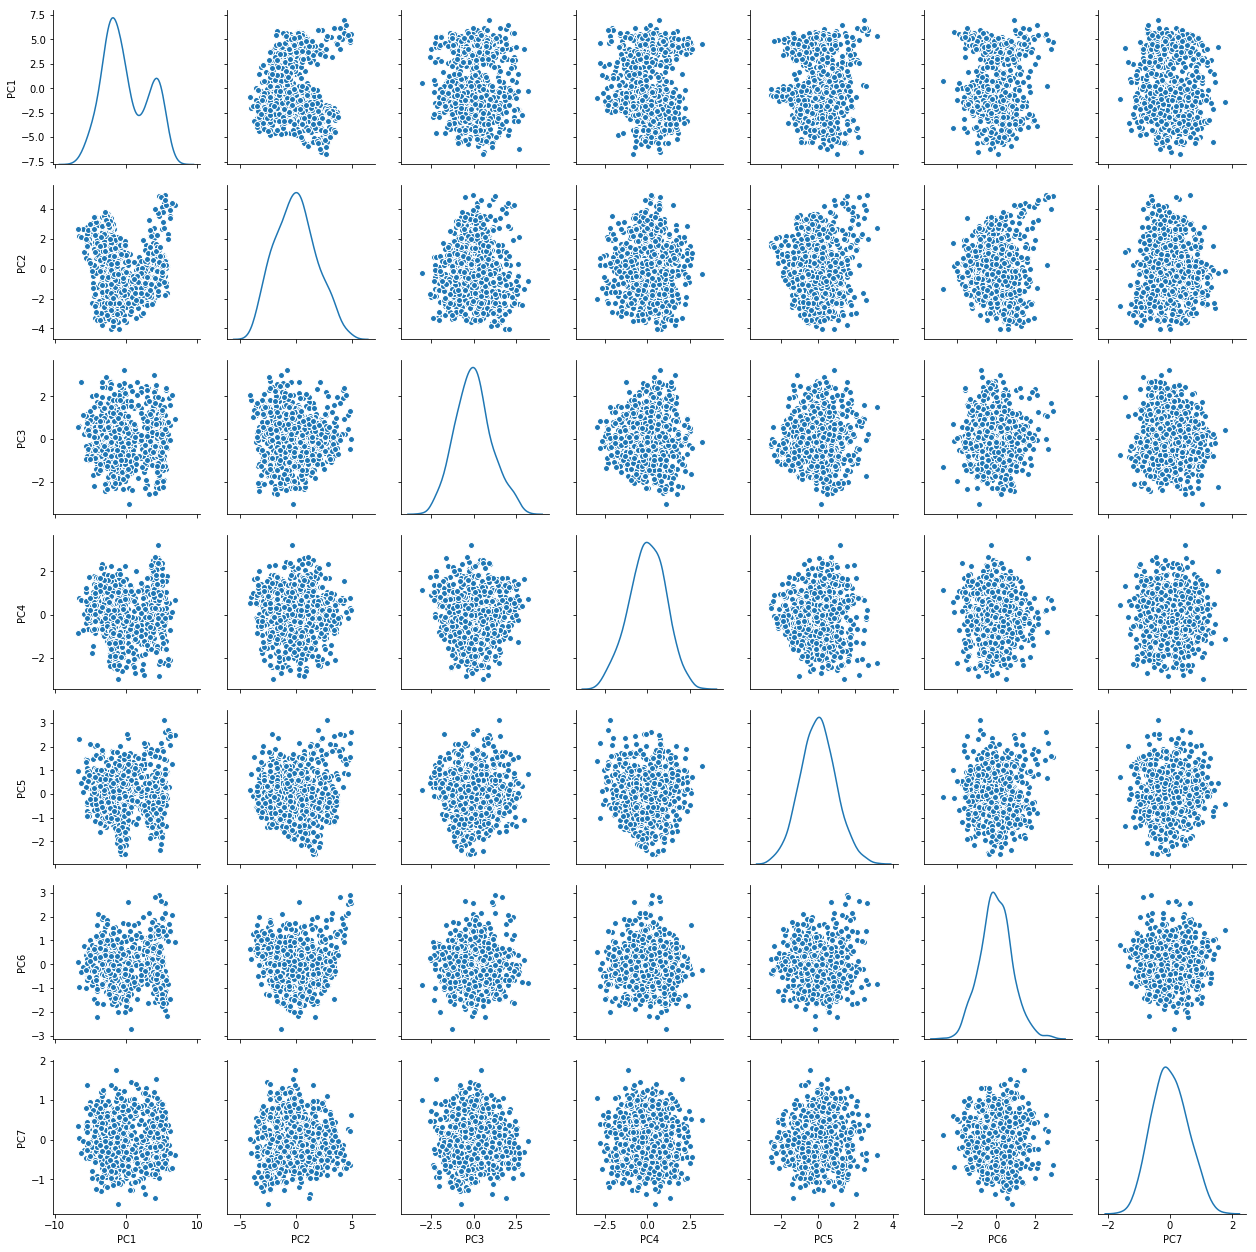

In [38]:
sns.pairplot(data_comp_fullset, diag_kind='kde')

Text(0.5,1,'Heatmap of Correlation Matrix')

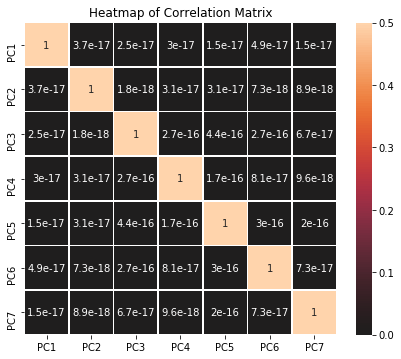

In [39]:
col_names =data_comp_fullset.columns
corr_matrix = data_comp_fullset[col_names].corr().abs()
plt.figure(figsize = (7,7))
cmap = sns.diverging_palette(500, 10, as_cmap=True)
sns.heatmap(corr_matrix,annot=True, xticklabels=corr_matrix.columns.values, yticklabels=corr_matrix.columns.values, vmax=.5, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

In [41]:
# PCA with entire components
pca = PCA(n_components=18)
data_full = pca.fit_transform(data_newset)
pca.fit_transform(data_newset).transpose()

array([[ 5.81296584e-01, -1.51325850e+00,  3.90949806e+00, ...,
         5.11868673e+00, -3.29722174e+00, -4.96546317e+00],
       [-6.72464313e-01, -3.37897166e-01,  2.43247034e-01, ...,
        -1.98862511e-01, -1.10512601e+00,  4.20596953e-01],
       [-4.95073089e-01, -2.97018011e-01, -1.26731471e+00, ...,
        -5.83325215e-01,  1.95190572e+00,  1.32882816e+00],
       ...,
       [-5.07604205e-02, -1.23146191e-01, -6.49576226e-02, ...,
        -8.55722136e-02,  2.94237523e-01,  1.49679255e-01],
       [ 8.54865565e-02,  6.85393514e-02,  8.95620588e-02, ...,
        -1.79600081e-02,  5.09054428e-02,  2.16585715e-02],
       [ 7.60289527e-03,  2.92887367e-03,  1.07266775e-01, ...,
        -1.82189965e-03,  3.06295520e-02,  5.25242879e-02]])

In [42]:
pca.components_

array([[ 2.72812597e-01,  2.88066358e-01,  3.02402793e-01,
         2.67992675e-01,  9.71958335e-02,  1.94897235e-01,
         3.10522981e-01, -3.09208594e-01,  3.07595330e-01,
         2.78605720e-01,  2.99911732e-01,  3.05672290e-01,
         2.63170208e-01, -4.14786948e-02,  3.44053128e-02,
         5.95669967e-02,  3.73801005e-02,  8.44405311e-02],
       [-8.77002275e-02,  1.33340136e-01, -4.43788926e-02,
        -2.00174477e-01, -2.58782541e-01, -1.07401982e-01,
         7.43170316e-02, -1.22588375e-02,  8.72621465e-02,
         1.22301326e-01,  7.62679995e-02,  6.65507748e-02,
         2.11963096e-01,  5.02463814e-01, -6.57245463e-03,
        -9.08509982e-02, -5.02030017e-01, -5.07705913e-01],
       [-3.08648918e-02, -2.03298626e-01,  6.61475650e-02,
         5.03846018e-02, -8.53410837e-02, -1.46163035e-01,
         1.11114280e-01, -9.08284118e-02,  1.06948914e-01,
        -2.15128437e-01,  1.41654581e-01,  1.05834643e-01,
        -2.04931128e-01,  7.55669132e-02, -5.28961365e

In [44]:
#Converting to dataframe
data_comp_full = pd.DataFrame(pca.components_,columns=list(data_newset))

#reinserting the droped target variable
data_comp_full['class'] = data['class']
data_comp_full.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.272813     0.288066              0.302403      0.267993   
1    -0.087700     0.133340             -0.044379     -0.200174   
2    -0.030865    -0.203299              0.066148      0.050385   
3     0.137752    -0.033962              0.105966     -0.252075   
4     0.124258    -0.129911             -0.079246      0.142396   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              0.097196                 0.194897       0.310523   
1             -0.258783                -0.107402       0.074317   
2             -0.085341                -0.146163       0.111114   
3             -0.598631                 0.269871       0.002386   
4              0.156841                -0.635812       0.083868   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0      -0.309209                0.307595                   0.278606   
1      -0.012259                0.087262                   0.122301   
2      -0.090828                0.106949                  -0.215128   
3       0.067335                0.027552                   0.043327   
4      -0.081267                0.075236                  -0.246525   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0         0.299912           0.305672                   0.263170   
1         0.076268           0.066551                   0.211963   
2         0.141655           0.105835                  -0.204931   
3        -0.067115          -0.001787                  -0.079851   
4         0.147840           0.096695                   0.001390   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.041479        0.034405          0.059567   
1                     0.502464       -0.006572         -0.090851   
2                     0.075567       -0.528961          0.692157   
3                    -0.116500        0.516007          0.407248   
4                     0.138755        0.568803          0.121238   

   skewness_about.2  hollows_ratio class  
0          0.037380       0.084441   van  
1         -0.502030      -0.507706   van  
2         -0.063702      -0.043910   car  
3         -0.018479       0.099111   van  
4          0.175669      -0.112432   bus

SVM:
    
1. Dataset is split into 70:30

In [45]:
from sklearn.model_selection import train_test_split

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score

target = data_comp_full["class"]
features = data_comp_full.drop("class", axis=1)
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size = 0.35, random_state = 10)

In [46]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear')
svc_model.fit(X_train, y_train)

prediction = svc_model .predict(X_test)

In [47]:
# checking the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.7272727272727273
0.42857142857142855


In [48]:
# Building a Support Vector Machine on train data
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [49]:
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.7272727272727273
0.42857142857142855


In [50]:
# SVM: for 7 components

from sklearn.model_selection import train_test_split

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score

target = data_comp_fullset["class"]
features = data_comp_fullset.drop("class", axis=1)
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size = 0.30, random_state = 7)

In [51]:
# Using Grid Search with C values - 0.01, 0.05, 0.5 and 1 and with Kernal - Linear and RBF and Cross Validation with 5 folds

params = {'C': [0.01, 0.05, 0.5, 1], 
          'kernel': ['linear','rbf']}
model = SVC()

In [53]:
# Making models with hyper parameters sets

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

model1 = GridSearchCV(model, param_grid=params, cv=5,n_jobs=-1)

In [54]:
#Learning
model1.fit(X_train,y_train)
#The best hyper parameters set
print(model1.best_params_)

{'C': 1, 'kernel': 'rbf'}


In [55]:
#Prediction
prediction=model1.predict(X_test)

In [56]:
#evaluation(Accuracy)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))

Accuracy: 0.937007874015748


In [57]:
#Confusion Matrix with ~ 93.7% accuracy from kernel= rbf and C= 1
print(metrics.confusion_matrix(prediction,y_test))

[[ 66   3   1]
 [  0 116   4]
 [  0   8  56]]
